# How to Train YOLOv8 Instance Segmentation on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Pro Tip: Use GPU Acceleration

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Install YOLOv8
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

In [ ]:
!nvidia-smi

Sat Jan 14 10:32:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks

Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.1/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

In [ ]:
# Import the dataset from roboflow

%cd {HOME}

!pip install roboflow --quiet
display.clear_output()

from roboflow import Roboflow

rf = Roboflow(api_key="YOUR CODE HERE")
project = rf.workspace("lounesal").project("pfe-odrk4")
dataset = project.version(6).download("yolov5")

/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 7.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to PFE-6 in yolov5pytorch:: 100%|██████████| 9160/9160 [00:03<00:00, 2871.92it/s]


In [ ]:
# Train on the custom dataset with the coco trained weight 'yolov8s-seg.pt'

%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=1000 imgsz=640

/content
Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/PFE-6/data.yaml, epochs=1000, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, 

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    results.csv
events.out.tfevents.1673692658.9a965d8740b5.8769.0  weights


/content


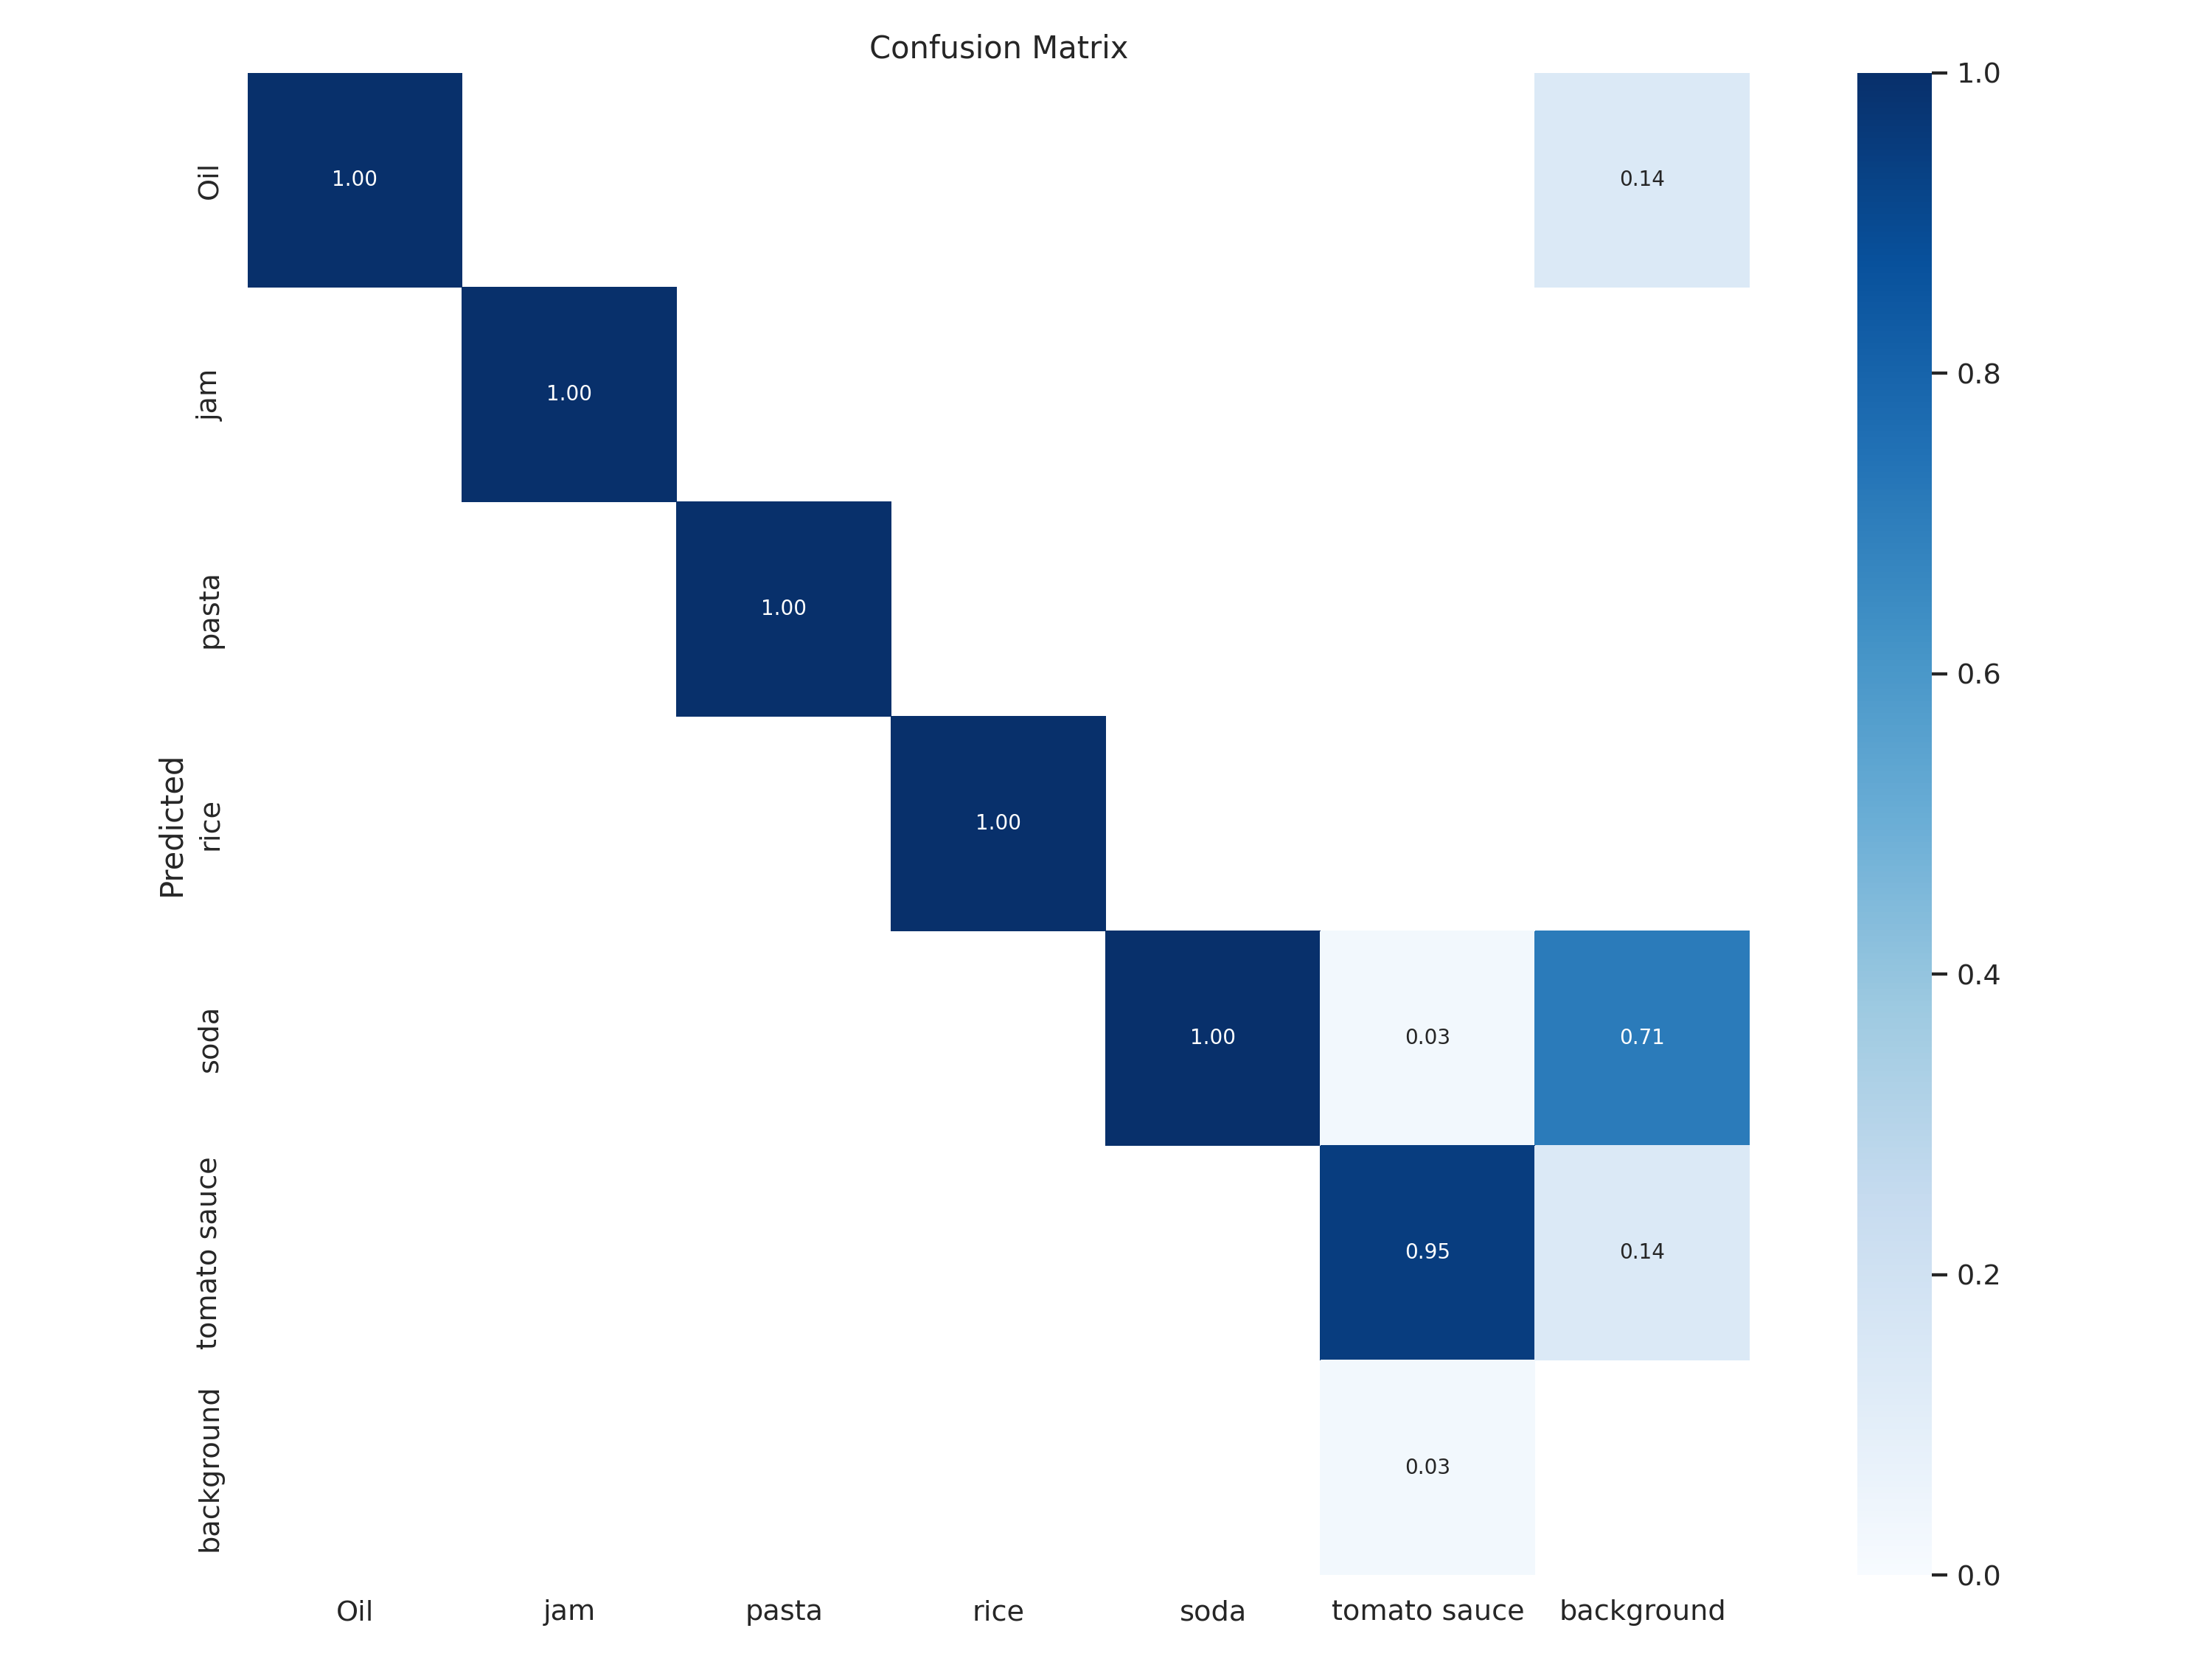

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


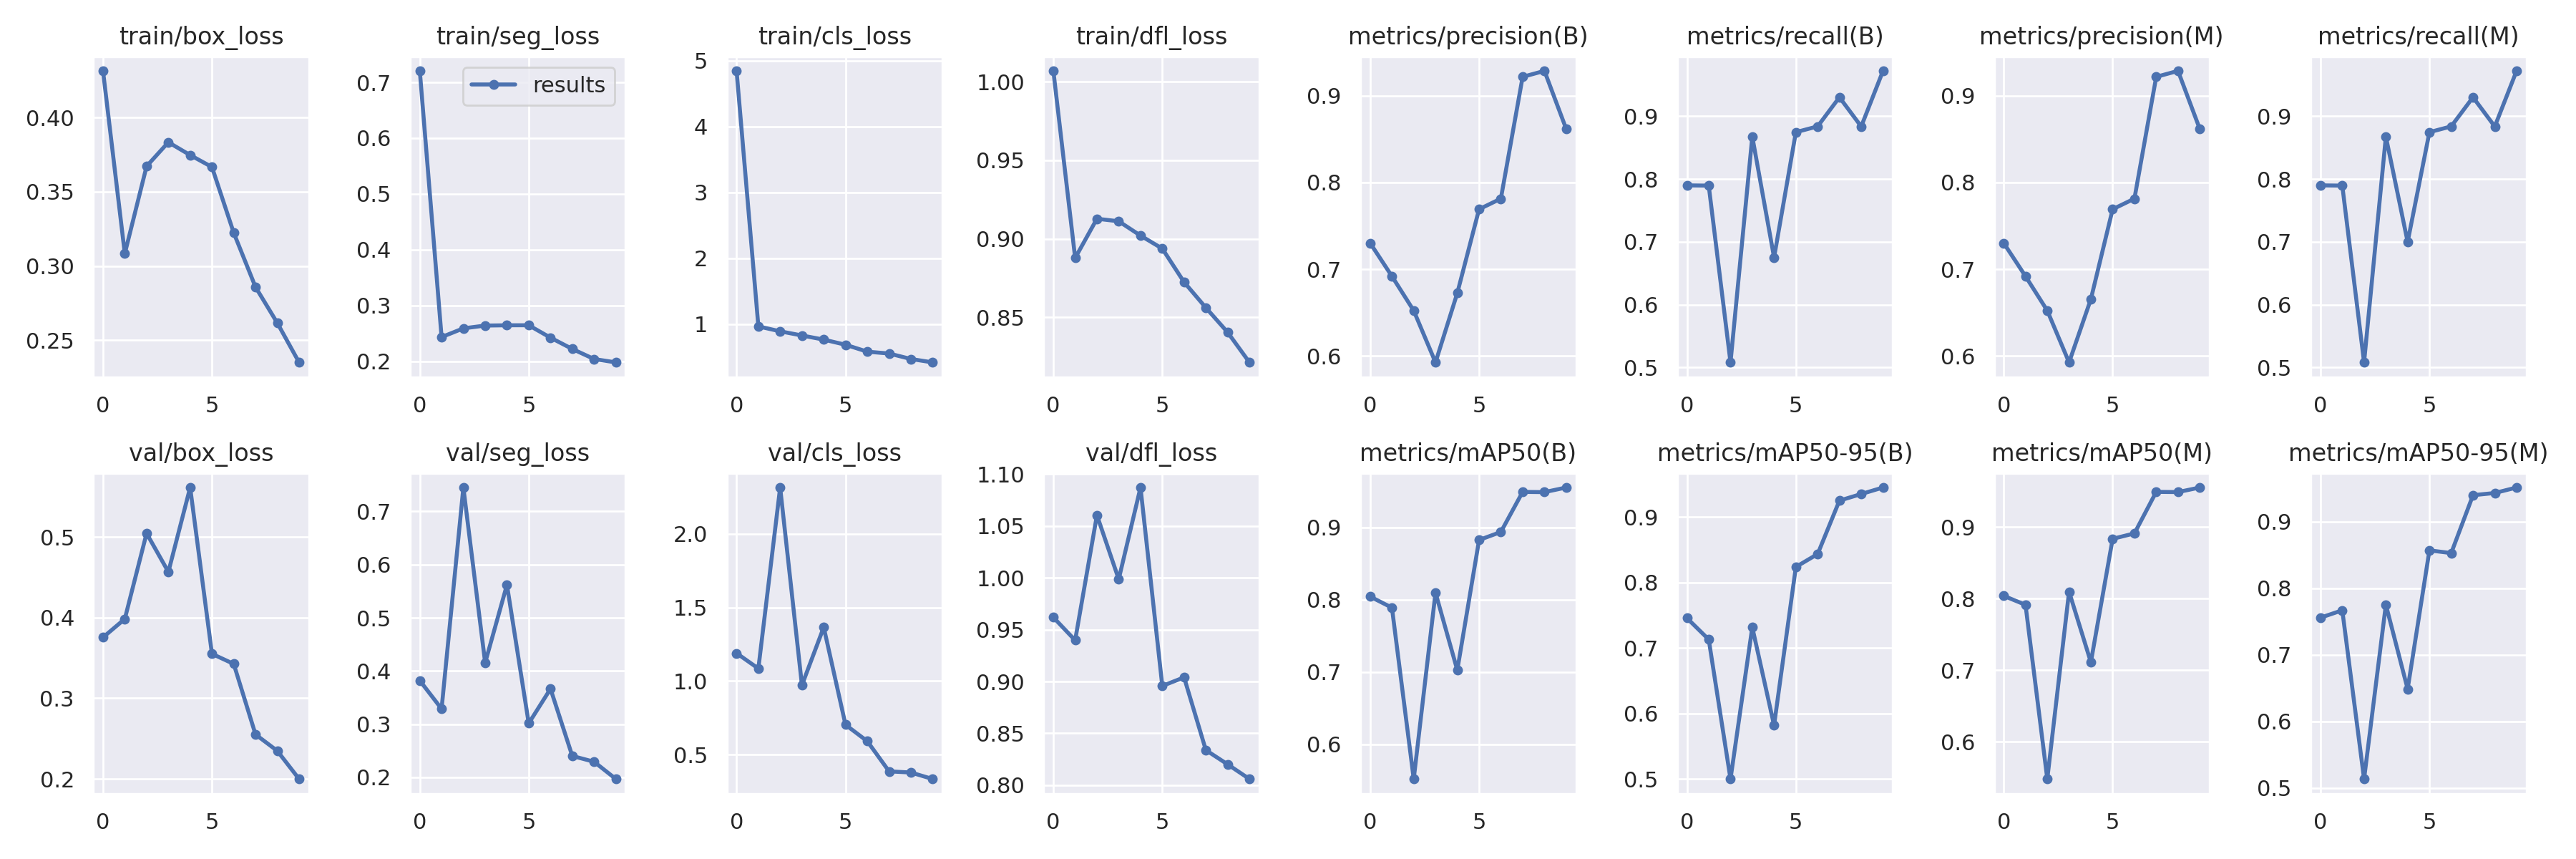

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=800)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=300)

## Validate Custom Model

In [ ]:
# Validation of the model 

%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/PFE-6/valid/labels.cache... 311 images, 1 backgrounds, 0 corrupt: 100% 311/311 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   5% 1/20 [00:00<00:18,  1.03it/s]Exception in thread Thread-3:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.8/dist-packages/ultralytics/yolo/utils/plotting.py", line 250, in plot_images
    annotator.box_label(box, label, color=color)
  File "/usr/local/lib/python3.8/dist-packages/ultralytics/yolo/utils/plotting.py", line 63, in box_label


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
image 1/70 /content/PFE-6/test/images/P1010432_JPG.rf.e37fa56e50f6bed0d48ec86e1d725baa.jpg: 640x640 6 gibbulas, 21.9ms
image 2/70 /content/PFE-6/test/images/P1010445_JPG.rf.be78bbacd84e556ad39181b19b52daa7.jpg: 640x640 6 gibbulas, 21.8ms
image 3/70 /content/PFE-6/test/images/P1010472_JPG.rf.226bd8d8a59347af24aef021df1c2900.jpg: 640x640 6 gibbulas, 21.4ms
image 4/70 /content/PFE-6/test/images/gibbula_07_16-1096-_jpg.rf.7b174d38c143957eeb5ec36c1c605d70.jpg: 640x640 2 gibbulas, 21.3ms
image 5/70 /content/PFE-6/test/images/gibbula_07_16-1097-_jpg.rf.632cd8777f2b205c4fcd37545105890d.jpg: 640x640 2 gibbulas, 21.4ms
image 6/70 /content/PFE-6/test/images/gibbula_07_16-1101-_jpg.rf.5751193b6d97c81c7ed7f10ae7541bba.jpg: 640x640 1 gibbula, 21.3ms
image 7/70 /content/PFE-6/test/images/gibbula_07_16-1120-_jpg.

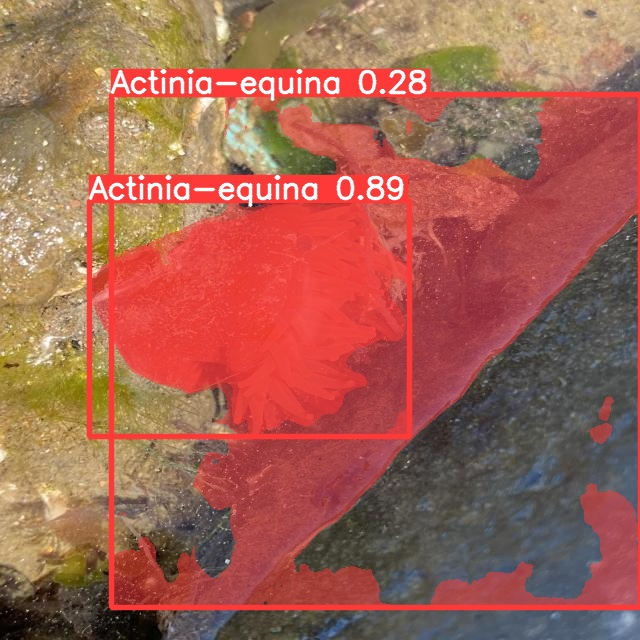

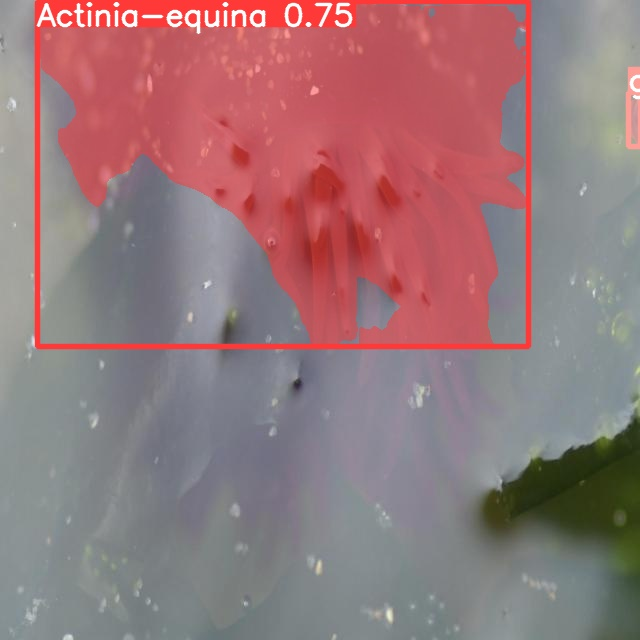

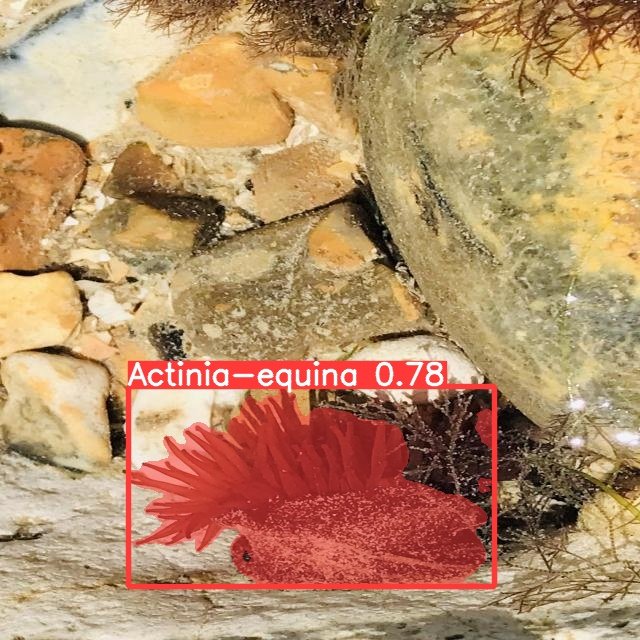

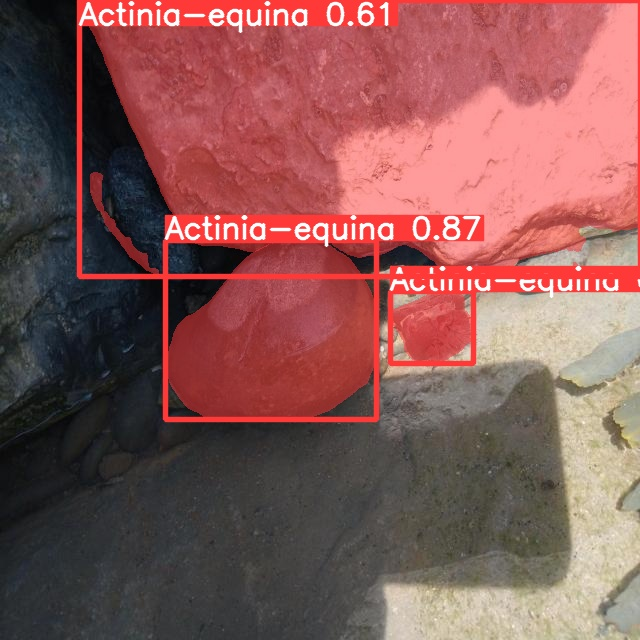

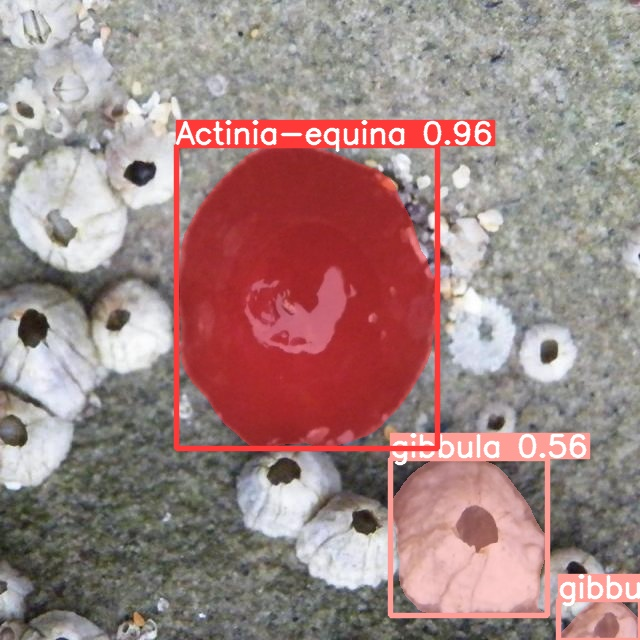

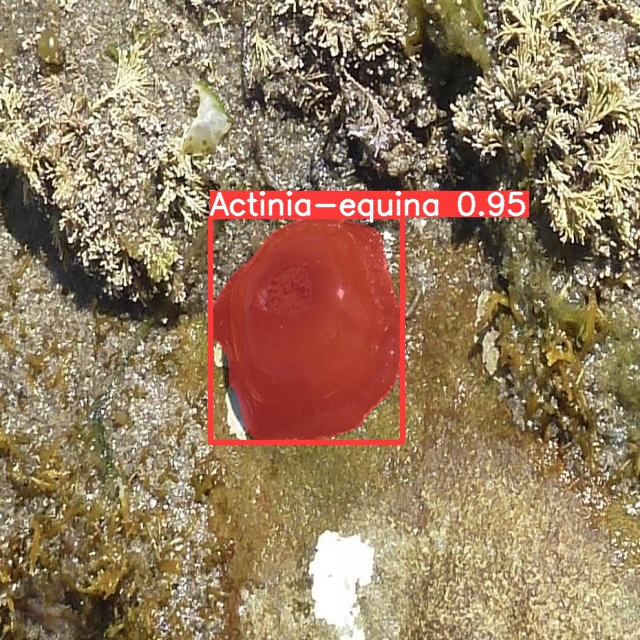

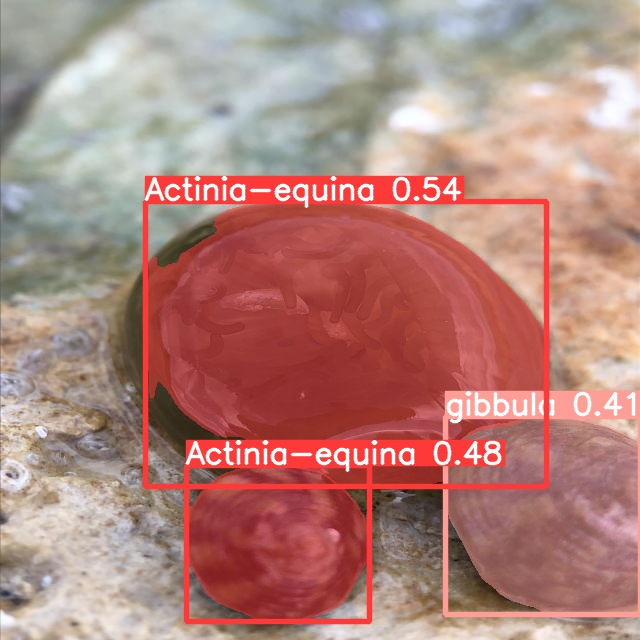

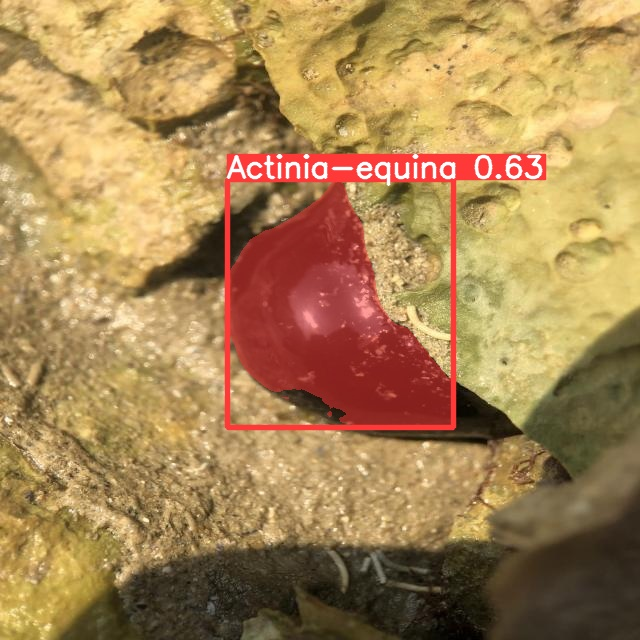

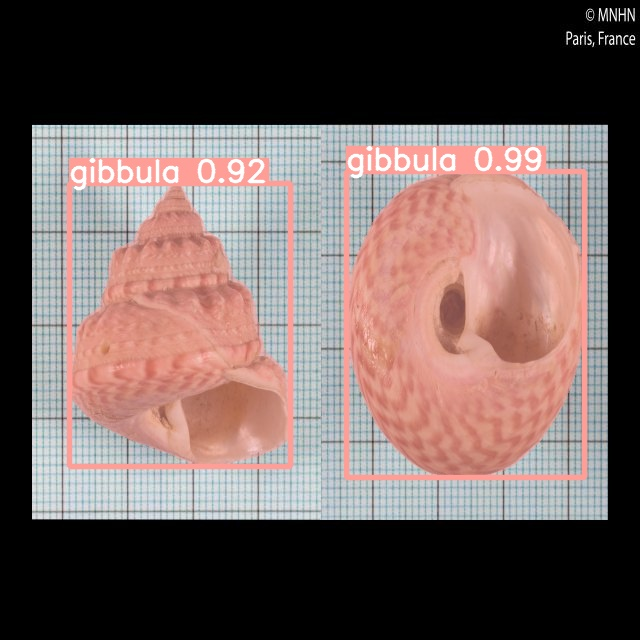

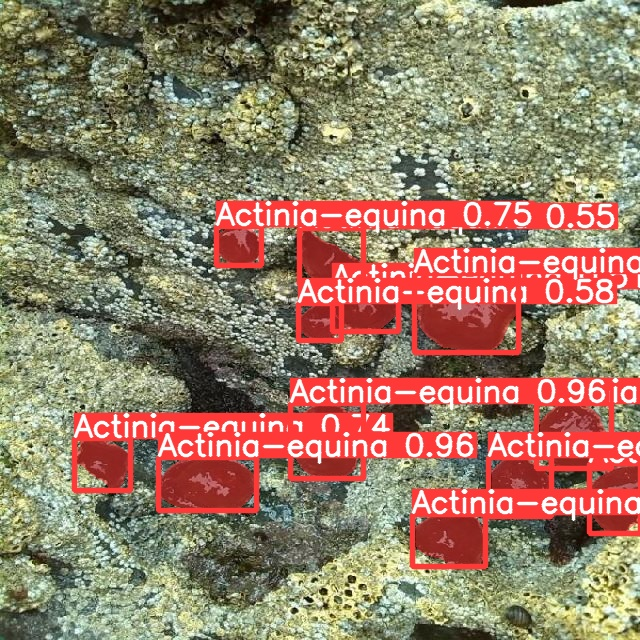

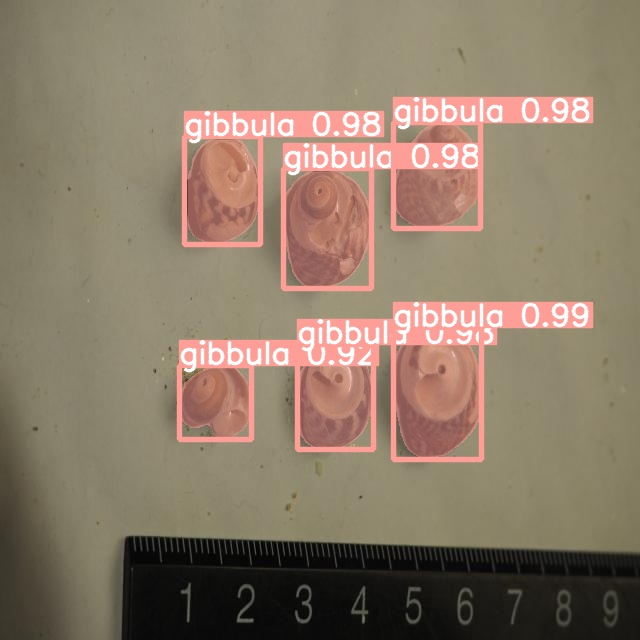

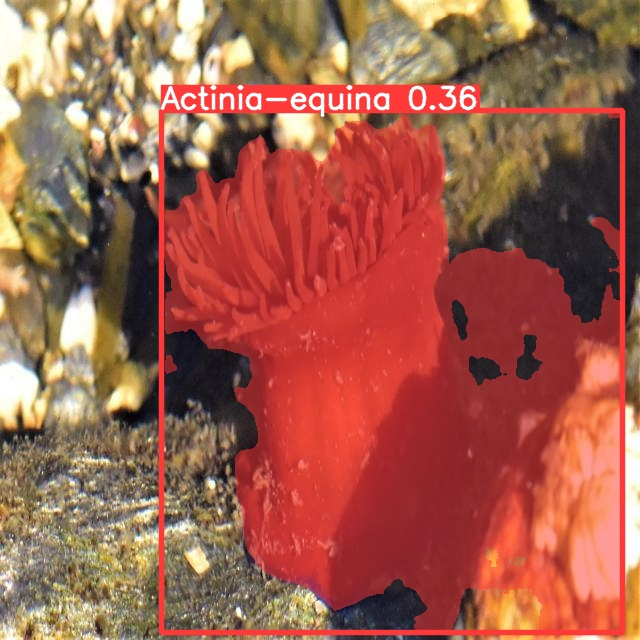

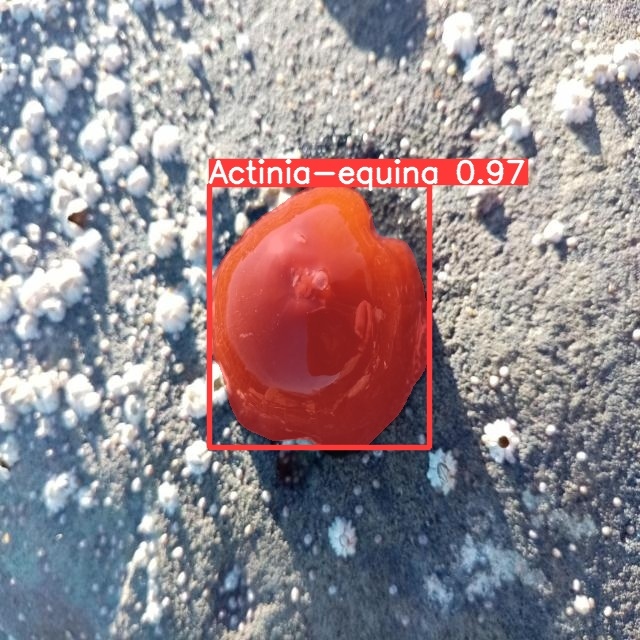

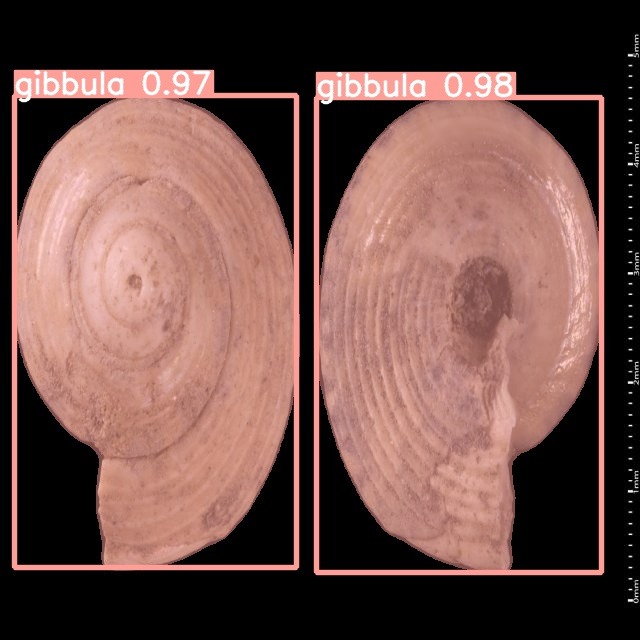

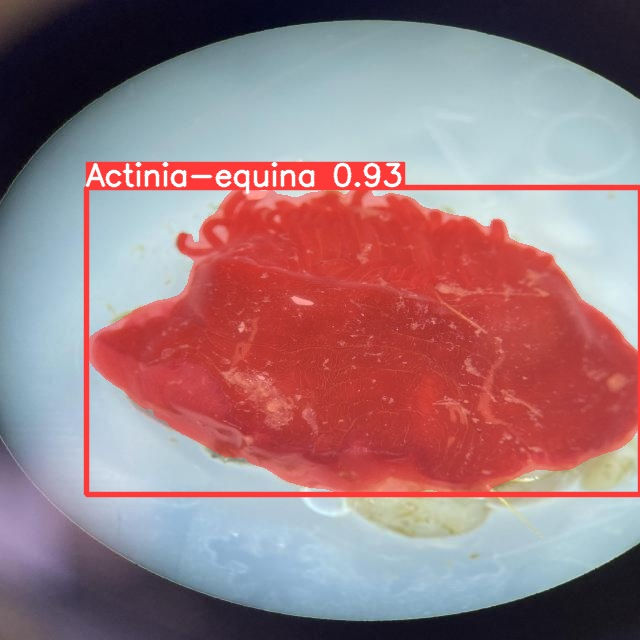

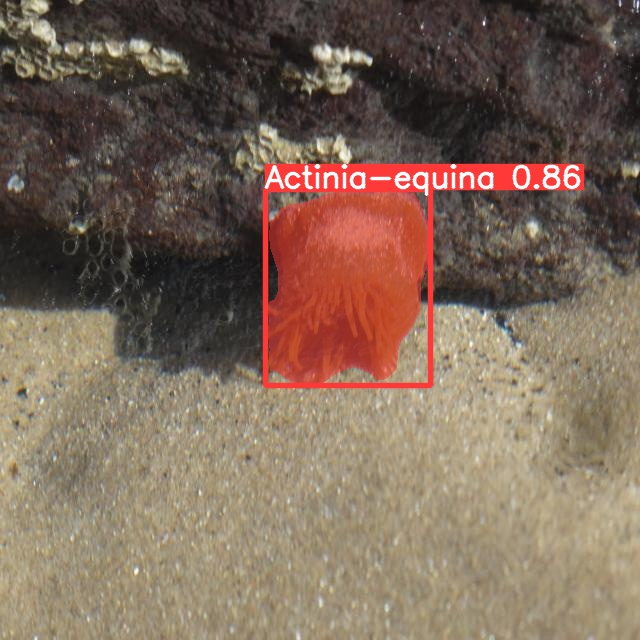

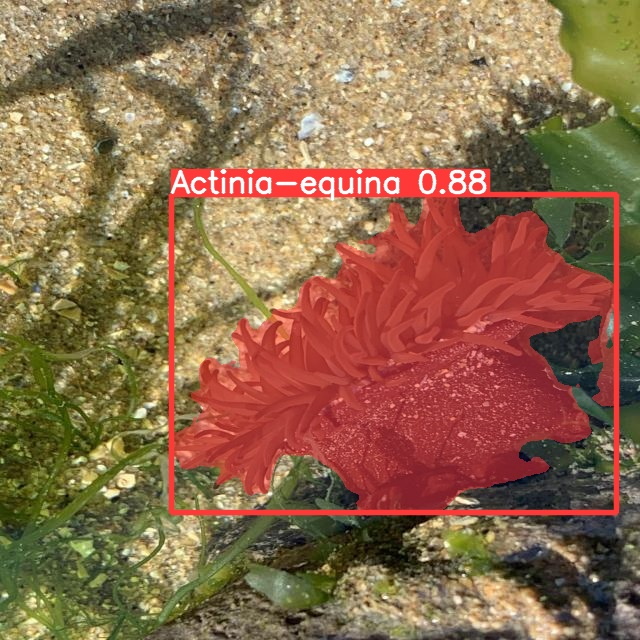

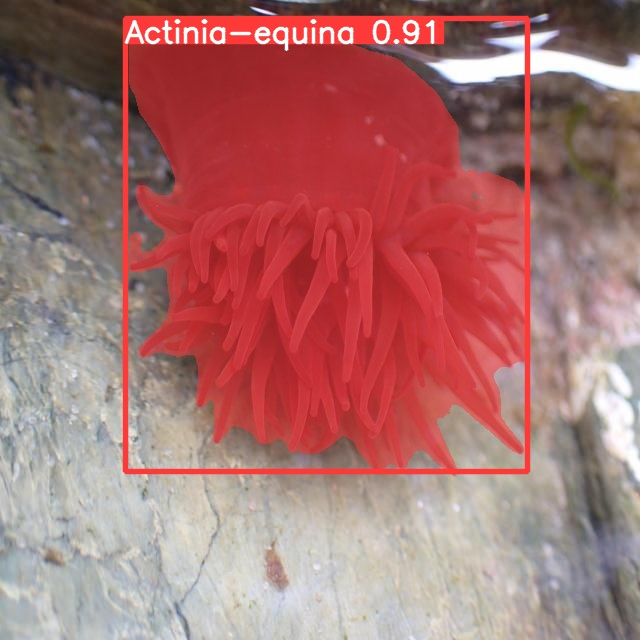

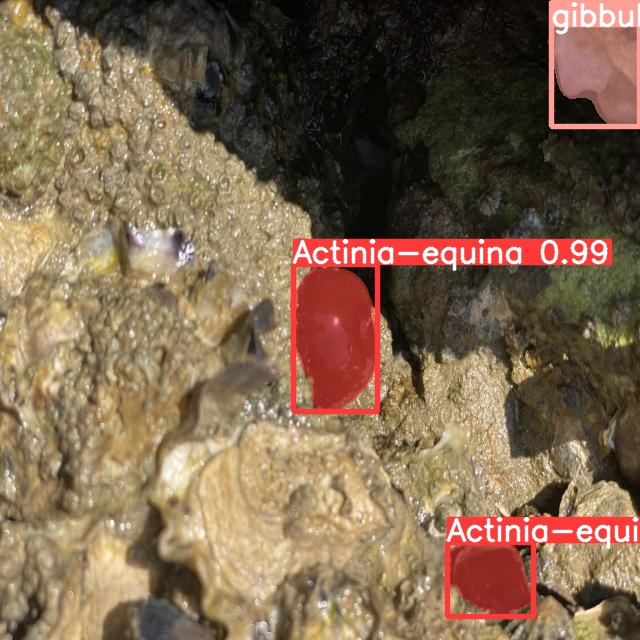

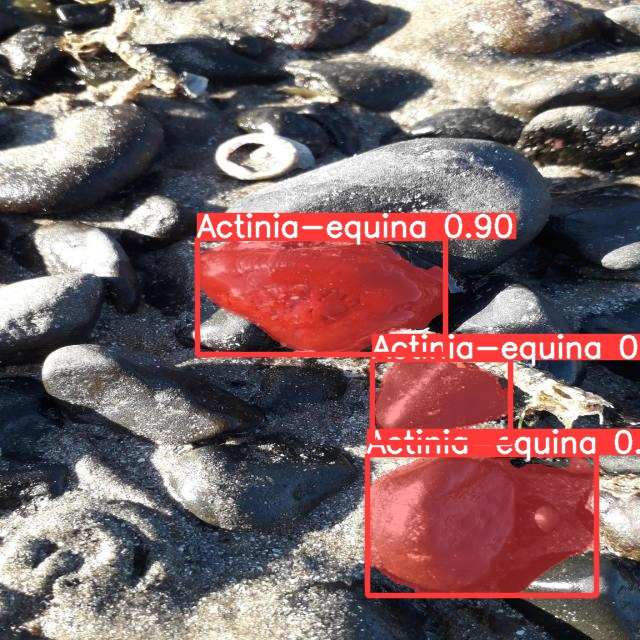

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:20]:
      display(Image(filename=image_path, height=300))
      print("\n")